In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path_test = "./data/test.csv"
file_path_train = "./data/train.csv"
train_data = pd.read_csv(file_path_train, index_col=0)
test_data = pd.read_csv(file_path_test, index_col=0)

In [3]:
train_data.info()
train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Age, Cabin, Embarked 에 빈 데이터가 있다는 것을 확인

In [4]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df = train_data.copy()

In [6]:
df.loc[df['Age'].isnull(), 'Age'] = -1.0

In [7]:
max(df.Age)

80.0

In [8]:
bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

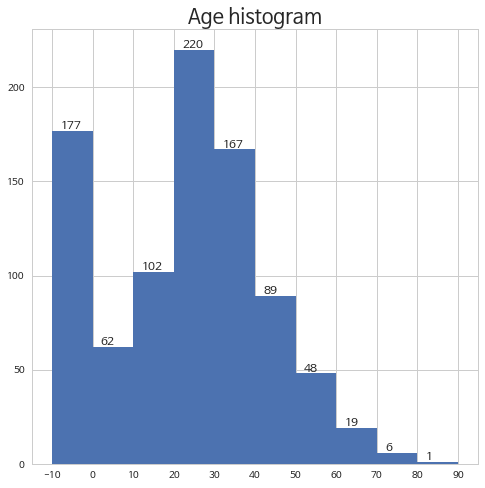

In [9]:
plt.figure(figsize=(8, 8))
cnt, bins, _ = plt.hist(df.Age, bins)
for i in range(len(cnt)):
    plt.text(bins[i]+2, cnt[i]+1.1, str(int(cnt[i])))
plt.title('Age histogram', fontsize=20)
plt.xticks(bins)
plt.show()

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

C = Cherbourg, Q = Queenstown, S = Southampton

## 이름분석

In [11]:
df_name = df.Name.str.split('(').str.get(0).str.split('.',expand=True)

In [12]:
df_name.head()

,0,1
PassengerId,,
1,"Braund, Mr",Owen Harris
2,"Cumings, Mrs",John Bradley
3,"Heikkinen, Miss",Laina
4,"Futrelle, Mrs",Jacques Heath
5,"Allen, Mr",William Henry


In [13]:
df_name = pd.concat([df_name[0].str.split(',', expand=True), 
                     df_name[1]], 
                    axis=1)
df_name.columns = list('Name' + str(i) for i in range(df_name.shape[1]))
for c in df_name.columns:
    df_name[c] = df_name[c].str.strip()

In [14]:
df_name.head()

,Name0,Name1,Name2
PassengerId,,,
1,Braund,Mr,Owen Harris
2,Cumings,Mrs,John Bradley
3,Heikkinen,Miss,Laina
4,Futrelle,Mrs,Jacques Heath
5,Allen,Mr,William Henry


In [15]:
uniq_honorific = df_name.iloc[:, 1].unique()
print(uniq_honorific)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [16]:
print('counts')
print('='*30)
for h in uniq_honorific:
    v = df_name.loc[df_name.iloc[:, 1]==h, :]
    print('{}: {}'.format(h, len(v)))

counts
Mr: 517
Mrs: 125
Miss: 182
Master: 40
Don: 1
Rev: 6
Dr: 7
Mme: 1
Ms: 1
Major: 2
Lady: 1
Sir: 1
Mlle: 2
Col: 2
Capt: 1
the Countess: 1
Jonkheer: 1


* Master : https://en.wikipedia.org/wiki/Master_(form_of_address)
* Mrs : https://en.wikipedia.org/wiki/Mrs.
* The Countess: 백작부인?
* Mlle: 프랑스 미혼자 https://en.wikipedia.org/wiki/French_honorifics
* Don, Jomkheer: 귀족성? 이런거 https://en.wikipedia.org/wiki/Jonkheer , https://en.wikipedia.org/wiki/Don_(honorific)
* Col : 계급 인듯 https://en.wikipedia.org/wiki/Colonel_(title)
* Major: 원사
* Rev: 기독교 목사.. https://ko.wikipedia.org/wiki/Reverend

In [17]:
df = pd.concat([df, df_name],axis=1)

In [18]:
df.groupby(['Sex', 'Name1'])['Survived'].count().unstack(1).fillna(0.0)

Name1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,182.0,2.0,1.0,0.0,125.0,1.0,0.0,0.0,1.0
male,1.0,2.0,1.0,6.0,1.0,0.0,2.0,40.0,0.0,0.0,0.0,517.0,0.0,0.0,6.0,1.0,0.0


In [19]:
df.loc[df.Name1.isin(['Jonkheer', 'Major','Dr','Don', 'Col', 'Mme', 'Mlle', 'Rev', 'Sir', 'the Countess']), :].sort_values(by=['Name1'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name0,Name1,Name2
PassengerId,,,,,,,,,,,,,,
695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,Weir,Col,John
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,Simonius-Blumer,Col,Oberst Alfons
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don,Manuel E
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Leader,Dr,Alice
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Minahan,Dr,William Edward
767,0,1,"Brewe, Dr. Arthur Jackson",male,-1.0,0,0,112379,39.6000,NaN,C,Brewe,Dr,Arthur Jackson
318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Moraweck,Dr,Ernest
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Pain,Dr,Alfred
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Stahelin-Maeglin,Dr,Max


In [20]:
df.loc[df.Name1=='the Countess', :].Name.values

array(['Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'], dtype=object)

In [21]:
df.loc[df.Name.isin(['Lucy Noel']), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name0,Name1,Name2
PassengerId,,,,,,,,,,,,,,


Sir -> Mr; the Countess -> Mrs; Mlle -> Miss; Mme, Ms, Dr, Col, Major, Rev, Don, Jonkheer -> Others

In [22]:
title_dict = {}
for u in uniq_honorific:
    if u in ['Mr', 'Mrs', 'Miss', 'Master']: 
        pass
    elif u == 'Sir':
        title_dict[u] = 'Mr'
    elif u == 'the Countess':
        title_dict[u] = 'Mrs'
    elif u == 'Mlle':
        title_dict[u] = 'Miss'
    else:
        title_dict[u] = 'Others'

In [23]:
df['Title'] = df['Name1'].replace(title_dict)

In [24]:
df_age_group = df.loc[df.Age != -1., :]
df_age_group.groupby(['Title'])['Age'].agg(['count', 'mean', 'median', 'max', 'min'])

,count,mean,median,max,min
Title,,,,,
Master,36,4.574167,3.5,12.0,0.42
Miss,148,21.804054,21.0,63.0,0.75
Mr,399,32.409774,30.0,80.0,11.00
Mrs,109,35.871560,35.0,63.0,14.00
Others,22,44.181818,46.5,70.0,23.00


/Users/Soo/anaconda/lib/python3.6/site-packages/matplotlib/gridspec.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


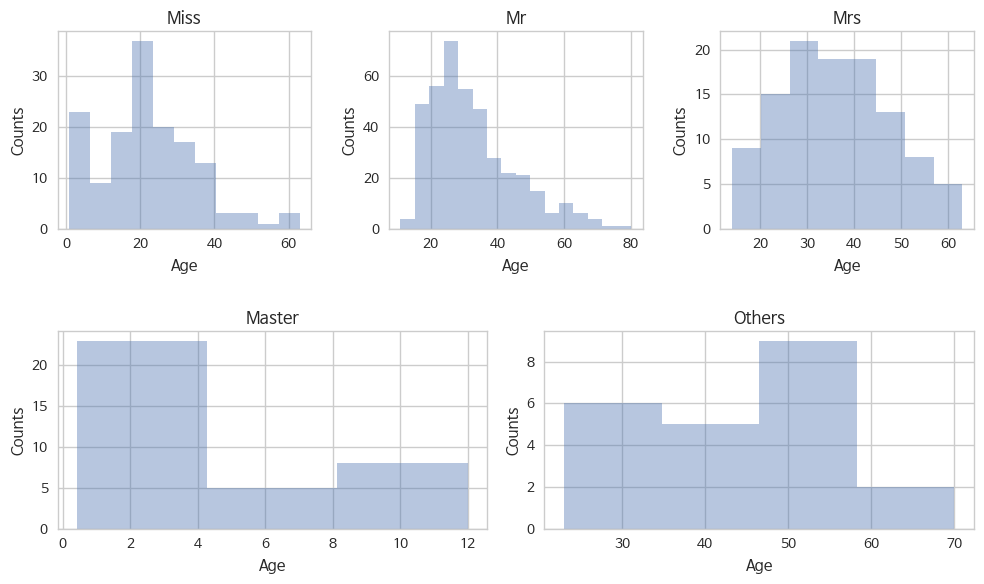

In [25]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 6), dpi=100)
gs1 = gridspec.GridSpec(1, 3)
gs2 = gridspec.GridSpec(1, 2)
axes = [fig.add_subplot(gs1[i]) for i in range(3)] + [fig.add_subplot(gs2[i]) for i in range(2)]
titles = ['Miss', 'Mr', 'Mrs', 'Master', 'Others']

for ax, t in zip(axes, titles):
    temp = df_age_group.loc[df_age_group.Title == t, 'Age']
    sns.distplot(temp, kde=False, ax=ax)
    ax.set_title(t)
    ax.set_ylabel('Counts')
gs1.tight_layout(fig, rect=[0, 0.5, 1, 1])
gs2.tight_layout(fig, rect=[0, 0, 1, 0.5])
plt.show()

In [26]:
df2 = df.copy()

In [27]:
title_ages = df_age_group.groupby(['Title'])['Age'].agg(['median'])
title_ages

,median
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Others,46.5


In [28]:
df2.loc[df2.Age == -1., 'Age'] = df2.loc[df2.Age == -1., ['Title']].replace(title_ages.to_dict()['median']).values

In [29]:
df2.Age.isnull().sum()

0

## 항구 Missing 데이터

C = Cherbourg(France), Q = Queenstown(Newzeland), S = Southampton(England)

In [30]:
df.loc[df.Embarked.isnull(), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name0,Name1,Name2,Title
PassengerId,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,Amelie,Miss
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,George Nelson,Mrs


In [31]:
df.loc[df.Name0.isin(['Icard', 'Stone']), 'Embarked']

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

가족없이 혼자 탄듯?

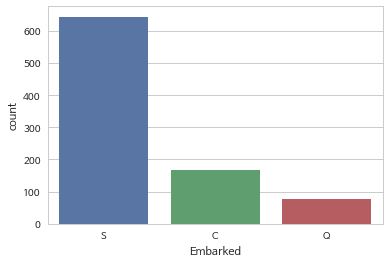

In [32]:
sns.countplot(df.Embarked)

제일 많이 탄 S로 넣어줌

In [33]:
df2.loc[df.Embarked.isnull(), 'Embarked'] = 'S'

In [34]:
df2.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Name0         0
Name1         0
Name2         0
Title         0
dtype: int64

## Fare dist

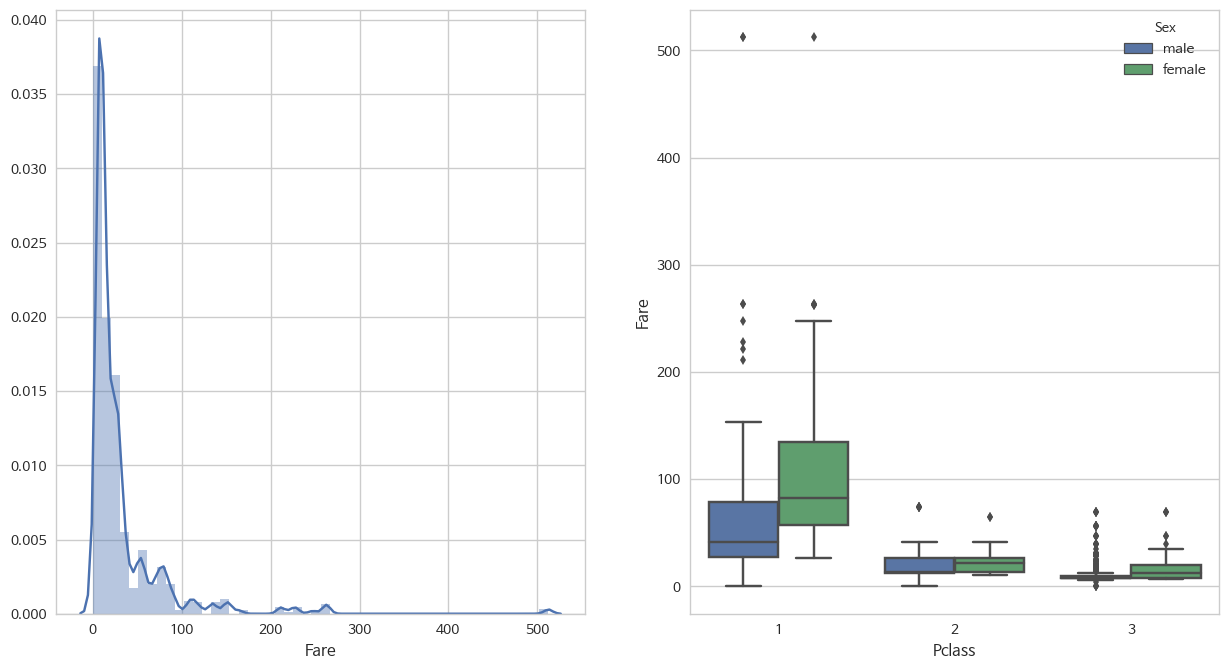

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), dpi=100)
sns.distplot(df.Fare, ax=ax1)
sns.boxplot(x='Pclass', y='Fare', hue='Sex', data=df, ax=ax2)
plt.show()

In [36]:
df.groupby(['Pclass', 'Sex'])['Fare'].agg(['count', 'min', 'max', 'mean', 'median'])

count      min       max        mean    median
Pclass Sex                                                   
1      female     94  25.9292  512.3292  106.125798  82.66455
       male      122   0.0000  512.3292   67.226127  41.26250
2      female     76  10.5000   65.0000   21.970121  22.00000
       male      108   0.0000   73.5000   19.741782  13.00000
3      female    144   6.7500   69.5500   16.118810  12.47500
       male      347   0.0000   69.5500   12.661633   7.92500

요금은 등급과 성별에 따라서 1등급만 차이가 있기에 1등 급에서만 좀 다르게 나눠서 보여주려고함

## 전체적으로 정리

In [1]:
def get_data(df, use_cols, key_preprocess=True, key_train=True):
    df = encoding(df)
    empty_cols = df.isnull().sum().loc[df.isnull().sum() > 0].index
    if key_preprocess:
        if 'Age' in empty_cols:
            df = process_age(df, method='median')
        # Others goes for Max or Median
        if 'Fare' in empty_cols:
            df = process_fare(df)
        # categorical datas
        for col in ['Pclass', 'Embarked']:
            if col in empty_cols:
                df = process_others(df, col)
    else:
        for col in empty_cols:
            df[col][df[col].isnull()] = -1.0
            
    # split x and y
    if key_train:
        df = df.loc[:, use_cols]
        x = df.iloc[:, 1:]
        y = df.iloc[:, :1]
        return x.values, y.values
    else:
        x = df.loc[:, use_cols[1:]]
        return x.values

def process_age(df, method='median'):
    df.loc[df.Age.isnull(), 'Age'] = -1.0
    df = get_title(df)
    ages_group = df.loc[df.Age != -1., :].groupby(['Title'])['Age'].agg([method])
    df.loc[df.Age == -1., 'Age'] = df.loc[df.Age == -1., ['Title']].replace(ages_group.to_dict()[method]).values
    
    return df

def process_fare(df, method='median'):
    df.loc[df.Fare.isnull(), 'Fare'] = -1.0
    fares_group = df.groupby(['Pclass', 'Sex'])['Fare'].agg([method]).reset_index()
    for c, s, v in fares_group.values:
        df.loc[(df.Fare == -1.) & (df.Pclass == c) & (df.Sex == s), 'Fare'] = v
    
    return df

def process_others(df, col):
    cls, counts = np.unique(df[col][~df[col].isnull()].values, return_counts=True)
    df.loc[df[col].isnull(), col] = -1.0
    max_cls = cls[np.argmax(counts)]
    df.loc[df[col] == -1., col] = max_cls
    
    return df

def get_title(df):
    df_name = df.Name.str.split('(').str.get(0).str.split('.',expand=True)
    df_name = pd.concat([df_name[0].str.split(',', expand=True), df_name[1]], axis=1)
    df_name.columns = list('Name' + str(i) for i in range(df_name.shape[1]))
    for c in df_name.columns:
        df_name[c] = df_name[c].str.strip()
    uniq_honorific = df_name.iloc[:, 1].unique()
    df = pd.concat([df, df_name], axis=1)
    title_dict = {}
    for u in uniq_honorific:
        if u in ['Mr', 'Mrs', 'Miss', 'Master']: 
            pass
        elif u == 'Sir':
            title_dict[u] = 'Mr'
        elif u == 'the Countess':
            title_dict[u] = 'Mrs'
        elif u == 'Mlle':
            title_dict[u] = 'Miss'
        else:
            title_dict[u] = 'Others'
    df['Title'] = df['Name1'].replace(title_dict) 
    return df

def encoding(df):
    sex_dict = {'male': 0, 'female': 1}
    embarked_dict = {'S': 0, 'C': 1, 'Q': 2}
    df.Sex = df.Sex.replace(sex_dict).values
    df.Embarked = df.Embarked.replace(embarked_dict).values
    return df

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']

In [3]:
def do_train(data, use_cols, key_preprocess=False):
    x_train, y_train = get_data(data.copy(), use_cols, key_preprocess=key_preprocess, key_train=True)
    clf = RandomForestClassifier(max_depth=5)
    clf.fit(x_train, y_train.ravel())
    
    return clf

def gen_y_test(test_data, use_cols, clf, file_name='sub.csv', key_preprocess=False):
    x_test = get_data(test_data.copy(), use_cols, key_preprocess=key_preprocess, key_train=False)
    y_test = clf.predict(x_test)
    sub = pd.read_csv('./data/gender_submission.csv')
    sub['Survived'] = y_test
    sub.to_csv('./data/' + file_name, index=False)

In [4]:
file_path_test = "./data/test.csv"
file_path_train = "./data/train.csv"
train_data = pd.read_csv(file_path_train, index_col=0)
test_data = pd.read_csv(file_path_test, index_col=0)

In [5]:
clf = do_train(train_data, use_cols, key_preprocess=False)
gen_y_test(test_data, use_cols, clf, file_name='sub_preprocess_x.csv', key_preprocess=False)

/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
clf_process = do_train(train_data, use_cols, key_preprocess=True)
gen_y_test(test_data, use_cols, clf_process, file_name='sub_preprocess_o.csv', key_preprocess=True)

In [43]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

---

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.
/Users/Soo/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [70]:
use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
# use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']
x_train, y_train = get_data(train_data.copy(), use_cols, key_preprocess=True, key_train=True)
x_test = get_data(test_data.copy(), use_cols, key_preprocess=True, key_train=False)

In [54]:
# x_train, y_train = get_data(train_data.copy(), use_cols, key_preprocess=False, key_train=True)
# x_test = get_data(test_data.copy(), use_cols, key_preprocess=False, key_train=False)

/Users/Soo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
x_train.shape

(891, 7)

In [48]:
# model 1
model = Sequential()

model.add(Dense(10, input_dim=5))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# model 2
model = Sequential()

model.add(Dense(20, input_dim=5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
# model 3
model = Sequential()

model.add(Dense(10, input_dim=7))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
# model 4
from keras import regularizers

model = Sequential()

model.add(Dense(10, input_dim=5, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
hist = model.fit(x_train, y_train, epochs=500, batch_size=64)

Epoch 1/500
891/891 [==============================] - 1s 1ms/step - loss: 0.6921 - acc: 0.6195
Epoch 2/500
891/891 [==============================] - 0s 45us/step - loss: 0.6825 - acc: 0.7059
Epoch 3/500
891/891 [==============================] - 0s 44us/step - loss: 0.6730 - acc: 0.6813
Epoch 4/500
891/891 [==============================] - 0s 38us/step - loss: 0.6643 - acc: 0.6936
Epoch 5/500
891/891 [==============================] - 0s 38us/step - loss: 0.6586 - acc: 0.6936
Epoch 6/500
891/891 [==============================] - 0s 51us/step - loss: 0.6519 - acc: 0.6992
Epoch 7/500
891/891 [==============================] - 0s 42us/step - loss: 0.6464 - acc: 0.6936
Epoch 8/500
891/891 [==============================] - 0s 39us/step - loss: 0.6405 - acc: 0.6970
Epoch 9/500
891/891 [==============================] - 0s 37us/step - loss: 0.6345 - acc: 0.6914
Epoch 10/500
891/891 [==============================] - 0s 46us/step - loss: 0.6258 - acc: 0.7015
Epoch 11/500
891/891 [========

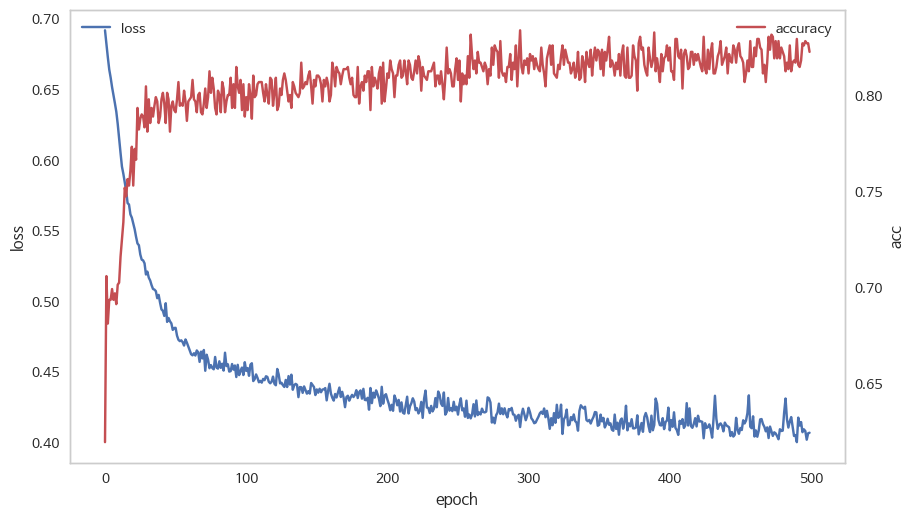

In [73]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax2 = ax.twinx()
ax.plot(hist.history['loss'], 'b-', label='loss')
ax2.plot(hist.history['acc'], 'r-', label='accuracy')
ax.set_ylabel('loss')
ax2.set_ylabel('acc')
ax.set_xlabel('epoch')
ax.legend(loc=2)
ax2.legend(loc=1)
ax.grid(False)
ax2.grid(False)
plt.show()

In [74]:
y_test_prob = model.predict(x_test)

In [75]:
y_test = (y_test_prob >= 0.5).astype(int)

In [77]:
sub = pd.read_csv('./data/gender_submission.csv')
sub['Survived'] = y_test
sub.to_csv('./data/' + 'sub_model1_regular.csv', index=False)

In [ ]:
# model 1 is best score: 77%